In [1]:
# import
import os, sys, shutil, pickle
import numpy as np
import pandas as pd
import scipy as sp
import nibabel as nib
from tqdm import tqdm
from sklearn.linear_model import LinearRegression

sys.path.extend([r'/home/lindenmp/research_projects/snaplab_tools'])
from snaplab_tools.utils import threshold_consistency, normalize_x
from snaplab_tools.plotting.utils import get_my_colors, get_p_val_string

# import plotting libraries
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 8})
plt.rcParams["svg.fonttype"] = "none"
import seaborn as sns

## Load data

In [2]:
in_dir = '/media/lindenmp/storage_ssd_1/research_data/MICA-MICs/collated_outputs'

atlas = 'Schaefer4007'
if atlas == 'Schaefer4007':
    n_parcels = 400
elif atlas == 'Schaefer2007':
    n_parcels = 200
elif atlas == 'Schaefer1007':
    n_parcels = 100

### Connectome

In [3]:
# Load data (deserialize)
with open(os.path.join(in_dir, 'mics_connectome.pkl'), 'rb') as handle:
    data = pickle.load(handle)

data.keys()

dict_keys(['sub-HC001', 'sub-HC002', 'sub-HC003', 'sub-HC004', 'sub-HC005', 'sub-HC006', 'sub-HC007', 'sub-HC008', 'sub-HC009', 'sub-HC010', 'sub-HC011', 'sub-HC012', 'sub-HC013', 'sub-HC014', 'sub-HC015', 'sub-HC016', 'sub-HC017', 'sub-HC018', 'sub-HC019', 'sub-HC020', 'sub-HC021', 'sub-HC022', 'sub-HC023', 'sub-HC024', 'sub-HC025', 'sub-HC026', 'sub-HC027', 'sub-HC028', 'sub-HC029', 'sub-HC030', 'sub-HC031', 'sub-HC032', 'sub-HC033', 'sub-HC034', 'sub-HC035', 'sub-HC036', 'sub-HC037', 'sub-HC038', 'sub-HC039', 'sub-HC040', 'sub-HC041', 'sub-HC042', 'sub-HC043', 'sub-HC044', 'sub-HC045', 'sub-HC046', 'sub-HC047', 'sub-HC048', 'sub-HC049', 'sub-HC050'])

In [4]:
subject_ids = list(data.keys())
n_subs = len(subject_ids)
n_subs

50

In [5]:
subject_filter = np.zeros(n_subs).astype(bool)

In [6]:
parc_dir = '/media/lindenmp/storage_ssd_1/research_data/MICA-MICs/derivatives/parcellations'

A = np.zeros((n_parcels, n_parcels, n_subs))

for i in np.arange(n_subs):
    try:
        adj = data[subject_ids[i]][atlas].copy()
        
        in_file = os.path.join(parc_dir, '{0}/ses-01/{0}_ses-01_atlas-{1}_space-T1w_res-1_regionsizes.txt'.format(subject_ids[i], atlas))
        voxel_counts = np.loadtxt(in_file, dtype=int)
        voxel_counts = normalize_x(voxel_counts) + 1e-5
        size_matrix = np.add.outer(voxel_counts, voxel_counts) / 2
        adj = np.divide(adj, size_matrix)
        adj_mask = adj > 0
        adj[adj_mask] += 1
        adj = np.log(adj, out=np.zeros_like(adj), where=(adj != 0))

        A[:, :, i] = adj
    except:
        subject_filter[i] = True

In [7]:
print(np.any(A < 0))
print(np.any(np.isinf(A)))
print(np.any(np.isnan(A)))

False
False
False


### fmri

In [8]:
# Load data (deserialize)
with open(os.path.join(in_dir, 'mics_rsfmri.pkl'), 'rb') as handle:
    data = pickle.load(handle)

data.keys()

dict_keys(['sub-HC001', 'sub-HC002', 'sub-HC003', 'sub-HC004', 'sub-HC005', 'sub-HC006', 'sub-HC007', 'sub-HC008', 'sub-HC009', 'sub-HC010', 'sub-HC011', 'sub-HC012', 'sub-HC013', 'sub-HC014', 'sub-HC015', 'sub-HC016', 'sub-HC017', 'sub-HC018', 'sub-HC019', 'sub-HC020', 'sub-HC021', 'sub-HC022', 'sub-HC023', 'sub-HC024', 'sub-HC025', 'sub-HC026', 'sub-HC027', 'sub-HC028', 'sub-HC029', 'sub-HC030', 'sub-HC031', 'sub-HC032', 'sub-HC033', 'sub-HC034', 'sub-HC035', 'sub-HC036', 'sub-HC037', 'sub-HC038', 'sub-HC039', 'sub-HC040', 'sub-HC041', 'sub-HC042', 'sub-HC043', 'sub-HC044', 'sub-HC045', 'sub-HC046', 'sub-HC047', 'sub-HC048', 'sub-HC049', 'sub-HC050'])

In [9]:
rsts = np.zeros((700, n_parcels, 1, n_subs))

for i in np.arange(n_subs):
    try:
        ts = data[subject_ids[i]][atlas]['rest'].values[:700, :]
        
        # gs = np.mean(ts, axis=1).reshape(-1, 1)
        # gs_diff = np.append(0, np.diff(gs, axis=0)).reshape(-1, 1)
        # nuis = np.concatenate((gs, gs_diff), axis=1)
        # nuis = np.concatenate((nuis, np.square(nuis)), axis=1)

        # regr = LinearRegression()
        # regr.fit(nuis, ts)
        # y_pred = regr.predict(nuis)
        # ts = ts - y_pred
        
        # z score
        ts = sp.stats.zscore(ts, axis=0)
        
        if np.any(np.isnan(ts)):
            print('Found NaNs!')
        if np.any(np.isinf(ts)):
            print('Found infs!')

        rsts[:, :, 0, i] = ts
    except:
        subject_filter[i] = True

Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!
Found NaNs!


## Filter

In [10]:
np.asarray(subject_ids)[subject_filter]

array([], dtype='<U9')

In [11]:
A = A[:, :, ~subject_filter]
rsts = rsts[:, :, :, ~subject_filter]

print(A.shape, rsts.shape)

(400, 400, 50) (700, 400, 1, 50)


In [12]:
Am = threshold_consistency(A, thr=0.6)
print(Am.shape)

(400, 400)


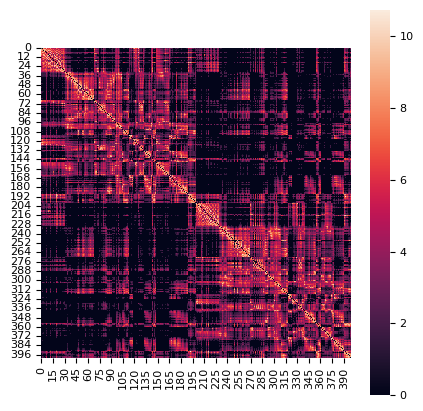

In [13]:
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(Am, ax=ax, square=True)
plt.show()

In [14]:
np.count_nonzero(np.triu(Am)) / ((Am.shape[0] ** 2 - Am.shape[0]) / 2)

0.5469172932330827

In [15]:
print(np.any(Am < 0))
print(np.any(np.isinf(Am)))
print(np.any(np.isnan(Am)))

False
False
False


## Save

In [16]:
# save
file_str = '/home/lindenmp/research_projects/nct_xr/data/MICS_{0}_A.npy'.format(atlas)
np.save(file_str, A)
file_str = '/home/lindenmp/research_projects/nct_xr/data/MICS_{0}_Am.npy'.format(atlas)
np.save(file_str, Am)
file_str = '/home/lindenmp/research_projects/nct_xr/data/MICS_{0}_rsts.npy'.format(atlas)
np.save(file_str, rsts)